# DIY: K-means clustering

## The input dataset to be clusterized

With the help of the Scikit-learn library we can generate a random dataset to be used in your "DoItYourself" K-means clustering algorithm.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
dataset, membership, centers = datasets.make_blobs(n_samples=500, n_features=2,
                                                   centers=3, return_centers=True,
                                                   cluster_std=1.0)

The "membership" variable is already the solution of our problems: How many cluster do we have? How are these clusters defined? Or what are the points that define each cluster?

Lets show with different colors the "solution clusters":

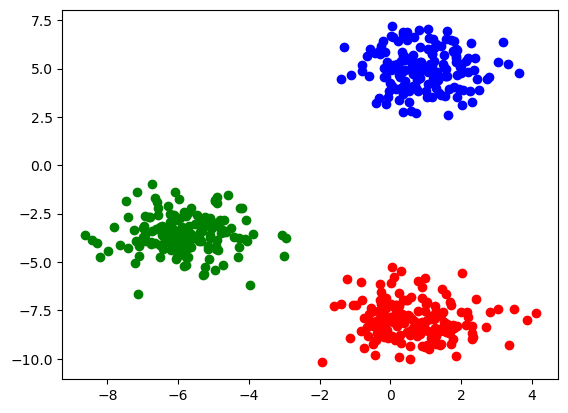

In [3]:
plt.scatter(dataset[(membership==0),0], dataset[(membership==0),1], color='r')
plt.scatter(dataset[(membership==1),0], dataset[(membership==1),1], color='g')
plt.scatter(dataset[(membership==2),0], dataset[(membership==2),1], color='b')
plt.show()

Now, it is suppossed you don't know the clusters... Let's check if the "k-means algorithm" can help us to clusterize the data.

## Pseudo-code of the K-means algorithm


```
1: Choose de number k of centroids
2: Initialize randomly the coordinates of the k centroids (they can be choosen from the data sample, or they can be new points)
3: Iterate
4:     Assign each point of the dataset to the closest centroid.
5:     Compute the new coordinates of the k centroids as the geometric center of the set of points assigned to them.
6:     Compute the displacements of each centroid
7: Until the centroids coordinates do not change
8: Identify the resulting k clusters as the k sets of points assigned to each centroid
```

## Step 1

Choose the number k of centroids:

In [4]:
k = 3

## Step 2

Initialize randomly the coordinates of the k centroids (they can be choosen from the data sample, or they can be new points)

In [5]:
# The initial random points are chosen inside a square box with limits [[], []]
# This is an optional choice... just to start with the k centroids close to the points

coors_k = np.random.uniform(low=np.min(dataset), high=np.max(dataset), size=[k,2])

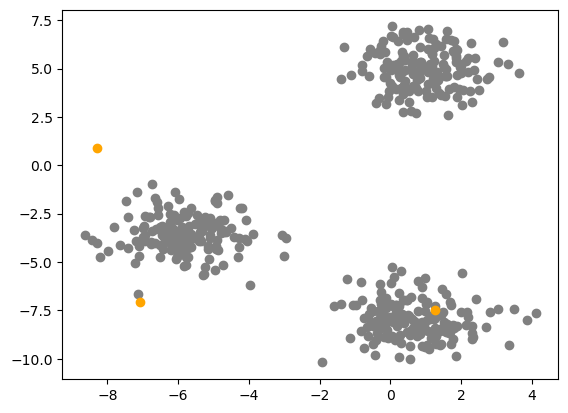

In [6]:
plt.scatter(dataset[:,0], dataset[:,1], color='gray')
plt.scatter(coors_k[:,0], coors_k[:,1], color='orange')

plt.show()

## Steps 3 to 7 (Iteration)

Iterate until the centroids coordinates do not change:
  - Assign each point of the dataset to the closest centroid.
  - Compute the new coordinates of the k centroids as the geometric center of the set of points assigned to them.
  - Compute the displacements of each centroid

In [7]:
# Let's create an array called membership to store the cluster index of each dataset point
n_data = dataset.shape[0]
membership = np.zeros([n_data], dtype=int)

In [8]:
# Let's create a variable to store the length of the largest movement of a centroid
# when their coordinates are updated. This variable will control the iterations.
# The iterations will stop when the largest movement of a centroid is lower than an epsilon parameter.
bigest_centroid_movement = np.inf
epsilon = 0.0001

In [9]:
while (bigest_centroid_movement>epsilon):
    
    # Step 4: Assign each point of the dataset to the closest centroid.
    for ii in range(n_data):
        aux_dist = np.inf
        for jj in range(k):
            dist = sp.spatial.distance.euclidean(dataset[ii], coors_k[jj])
            if dist<aux_dist:
                aux_dist = dist
                membership[ii]=jj
    
    # Step 5: Compute the new coordinates of the k centroids as the geometric center of the set of points assigned to them.
    new_coors_k = np.zeros([k,2], dtype=float)
    for ii in range(k):
        mask = (membership == ii)
        new_coors_k[ii,:] = np.mean(dataset[mask], axis=0)

    # Step 6: Compute the displacements of each centroid
    # The variable bigest_centroid_movement is updated to work with Step 7:
    # Step 7: Iterate until the centroids coordinates do not change
    
    bigest_centroid_movement = 0.0
    
    for ii in range(k):
        
        movement = sp.spatial.distance.euclidean(coors_k[ii], new_coors_k[ii])

        if movement>bigest_centroid_movement:
            bigest_centroid_movement = movement
    
    # the variable coors_k are updated to work with the next iteration step
    coors_k = new_coors_k    
    
    # Some info is printed out to check how the iterations are working
    print('Largest movement:', bigest_centroid_movement)
    print('New centroids:', coors_k)
    print('')

Largest movement: 8.630670977349538
New centroids: [[-0.19586653  3.84857699]
 [ 0.73483246 -7.75278033]
 [-5.81291052 -3.89685582]]

Largest movement: 1.5851003084253923
New centroids: [[ 0.92851568  4.96585388]
 [ 0.7026238  -7.9557259 ]
 [-5.83894728 -3.57512952]]

Largest movement: 0.0
New centroids: [[ 0.92851568  4.96585388]
 [ 0.7026238  -7.9557259 ]
 [-5.83894728 -3.57512952]]



# Step 8
Identify the resulting k clusters as the k sets of points assigned to each centroid.

In [11]:
# The variable membership has the cluster index of each dataset point
membership

array([1, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0,
       2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1,
       2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1,
       0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0,
       2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2,
       1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1,
       0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1,

Let's show each cluster with a different color and the final centroids in orange:

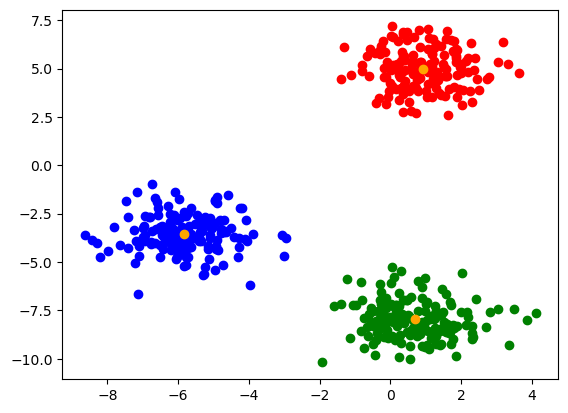

In [13]:
plt.scatter(dataset[(membership==0),0], dataset[(membership==0),1], color='r')
plt.scatter(dataset[(membership==1),0], dataset[(membership==1),1], color='g')
plt.scatter(dataset[(membership==2),0], dataset[(membership==2),1], color='b')

plt.scatter(coors_k[:,0], coors_k[:,1], color='orange')

plt.show()